In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
dSalary=pd.read_csv('C:/Users/Jorge/Desktop/9b/Extraccion de datos/SalaryData.csv')

In [3]:
dSalary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
x = dSalary.iloc[:,:-1].values
y = dSalary.iloc[:,1].values

In [5]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [6]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [7]:
#Dividir los datos de entrenamiento y prueba 80% entrenamiento y 20% prueba
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [8]:
#Construir el modelo
reg = LinearRegression()

In [9]:
reg.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
LinearRegression()

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
y_pred = reg.predict(x_test)
x_pred = reg.predict(x_train)

Training Set


<function matplotlib.pyplot.show(close=None, block=None)>

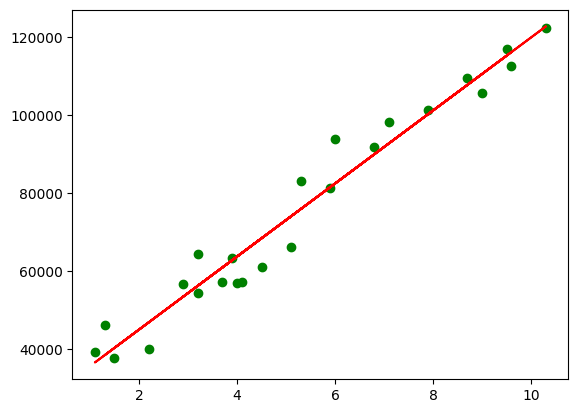

In [12]:
print("Training Set")
plt.scatter(x_train, y_train,color='green')
plt.plot(x_train,x_pred,color="red")
plt.show


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [18]:
print("=== Metricas de evaluacion de modelo ===")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"MSE (Error Cuadratico Medio): {mse:.2f}")
print(f"RMSE (Raiz del Error Cuadratico Medio): {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

=== Metricas de evaluacion de modelo ===
MAE (Error Absoluto Medio): 5469.54
MSE (Error Cuadratico Medio): 39936825.15
RMSE (Raiz del Error Cuadratico Medio): 6319.56
R2 Score: 0.9548


In [20]:
print("Prueba del Modelo")

valores_ejemplo =[1,3,5,8,12]

for valor in valores_ejemplo:
    prediccion = reg.predict([[valor]])[0]
    print(f"- Si X = {valor:2d} -> Salario predicho: ${prediccion:,.2f}")

Prueba del Modelo
- Si X =  1 -> Salario predicho: $35,612.09
- Si X =  3 -> Salario predicho: $54,334.05
- Si X =  5 -> Salario predicho: $73,056.01
- Si X =  8 -> Salario predicho: $101,138.96
- Si X = 12 -> Salario predicho: $138,582.88


In [26]:
import joblib

joblib.dump(reg, 'modelo_salario_pkl')
print("Modelo guardado como 'modelo_salario_pkl'")

def cargar_modelo_y_predecir(x_val, ruta_modelo='modelo_salario_pkl'):
    modelo = joblib.load(ruta_modelo)
    prediccion = modelo.predict([[x_val]])[0]
    return prediccion

print("\nProbando modelo cargado")
x_prueba = 15
pred_cargado = cargar_modelo_y_predecir(x_prueba)
print(f"X = {x_prueba} Prediccion: ${pred_cargado:,.2f}")

Modelo guardado como 'modelo_salario_pkl'

Probando modelo cargado
X = 15 Prediccion: $166,665.82
